<h1 style="color: #FF8C00;">Portfolio Analyst. Prueba Python.</h1>

---

La siguiente prueba consistirá en hacer una serie de cálculos y gráficos para analizar un conjunto de activos financieros.

Para ello deberás desarrollar el código necesario que permita realizar cada una de las tareas.


<h2 style="color: #FF6347;">Import de librerías a usar</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#Te permite hacer plots aunque este enmedio de algo
%matplotlib inline 
pd.set_option('display.max_columns', None) #asi me deja ver todas las columnas.
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import statsmodels.api as sm
import matplotlib.dates as mdates


<h1 style="color: #FF8C00;">Ejercicio 1. Carga de datos y gráfico de precios.</h1>

En este primer ejercicio debes cargar el fichero que contiene los precios de los activos financieros a analizar. Este fichero se llama `financial_assets_prices.csv`.

Una vez cargados los precios de los activos, debes pintarlos en un gráfico temporal. Ten en cuenta que para que puedan ser comparados deben comenzar todas las series en el mismo valor.

<h2 style="color: #FF6347;">Carga de datos</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [3]:
df_prices = pd.read_csv("C:/Users/astri/Ironhack/Assesment/Assement_portfolio/financial_assets_prices.csv")
df_prices.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13


In [5]:
len(df_prices)

783

In [7]:
#limipamos los NANS
df_limpio = df_prices.ffill()


In [9]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    783 non-null    object 
 1   Asset1  783 non-null    float64
 2   Asset2  783 non-null    float64
 3   Asset3  783 non-null    float64
 4   Asset4  783 non-null    float64
 5   Asset5  783 non-null    float64
dtypes: float64(5), object(1)
memory usage: 36.8+ KB


In [11]:
df_limpio['date'] = pd.to_datetime(df_limpio['date'])

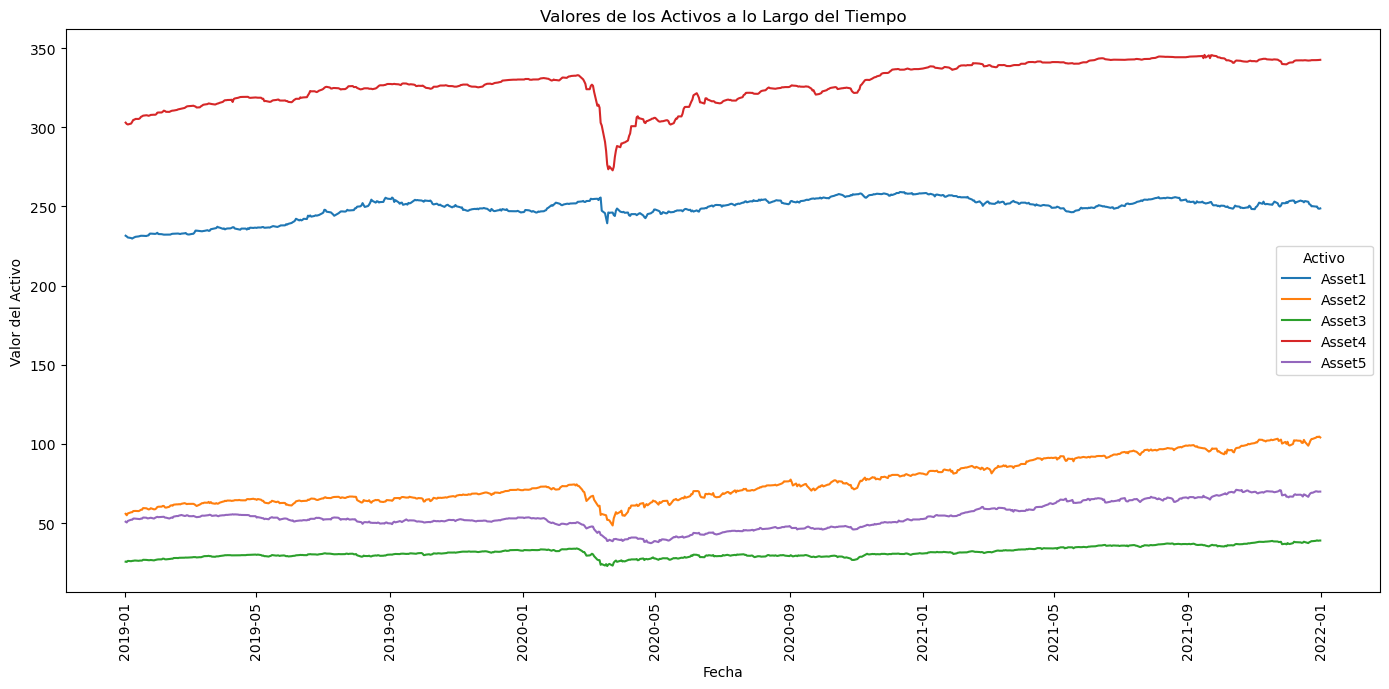

In [13]:
df_long = df_limpio.melt(id_vars='date', value_vars=['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5'],
                         var_name='Activo', value_name='Valor')

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_long, x='date', y='Valor', hue='Activo')

# Añadir etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Valor del Activo')
plt.title('Valores de los Activos a lo Largo del Tiempo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<h1 style="color: #FF8C00;">Ejercicio 2. Rendimientos diarios porcentuales.</h1>

En este segundo ejercicio debes calcular los rendimientos diarios porcentuales de cada uno de los activos y obtener la siguiente información de ellos:
- Calcular la matriz de correlaciones entre los 5 activos.
- Realizar un gráfico de dispersión entre los rendimientos de 2 activos.

<h2 style="color: #FF6347;">Cálculo de rendimientos diarios.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [15]:
# Ejemplo para un DataFrame con múltiples columnas de precios de cierre para diferentes activos
df_2 = df_limpio.copy()
rendimientos_diarios = df_limpio[['Asset1', 'Asset2', 'Asset3','Asset4','Asset5']].pct_change() #si multiplico aqui *100 saco la variacion no el rendimiento diario.
rendimientos_diarios.columns = ['Asset1', 'Asset2', 'Asset3','Asset4','Asset5']

rendimientos_diarios.head()

,Asset1,Asset2,Asset3,Asset4,Asset5
0,NaN,NaN,NaN,NaN,NaN
1,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2,-0.002740,0.020954,0.025255,-0.001125,0.019242
3,-0.001512,0.012632,-0.007338,0.001856,0.014792
4,-0.001535,0.001003,0.007040,0.003605,-0.000192


<h2 style="color: #FF6347;">Cálculo de la matriz de correlaciones.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [17]:
#hacemos una copy del origina quitando la columna de date para sacar el mapa de calor de los precios.
df_calor = df_limpio.copy()
df_calor = df_calor.drop(columns=["date"]) 


In [19]:
df_calor.head()

,Asset1,Asset2,Asset3,Asset4,Asset5
0,231.5061,55.875,25.649222,302.93,50.89
1,231.0356,54.977,25.503047,302.11,50.41
2,230.4026,56.129,26.147133,301.77,51.38
3,230.0543,56.838,25.955277,302.33,52.14
4,229.7012,56.895,26.137997,303.42,52.13


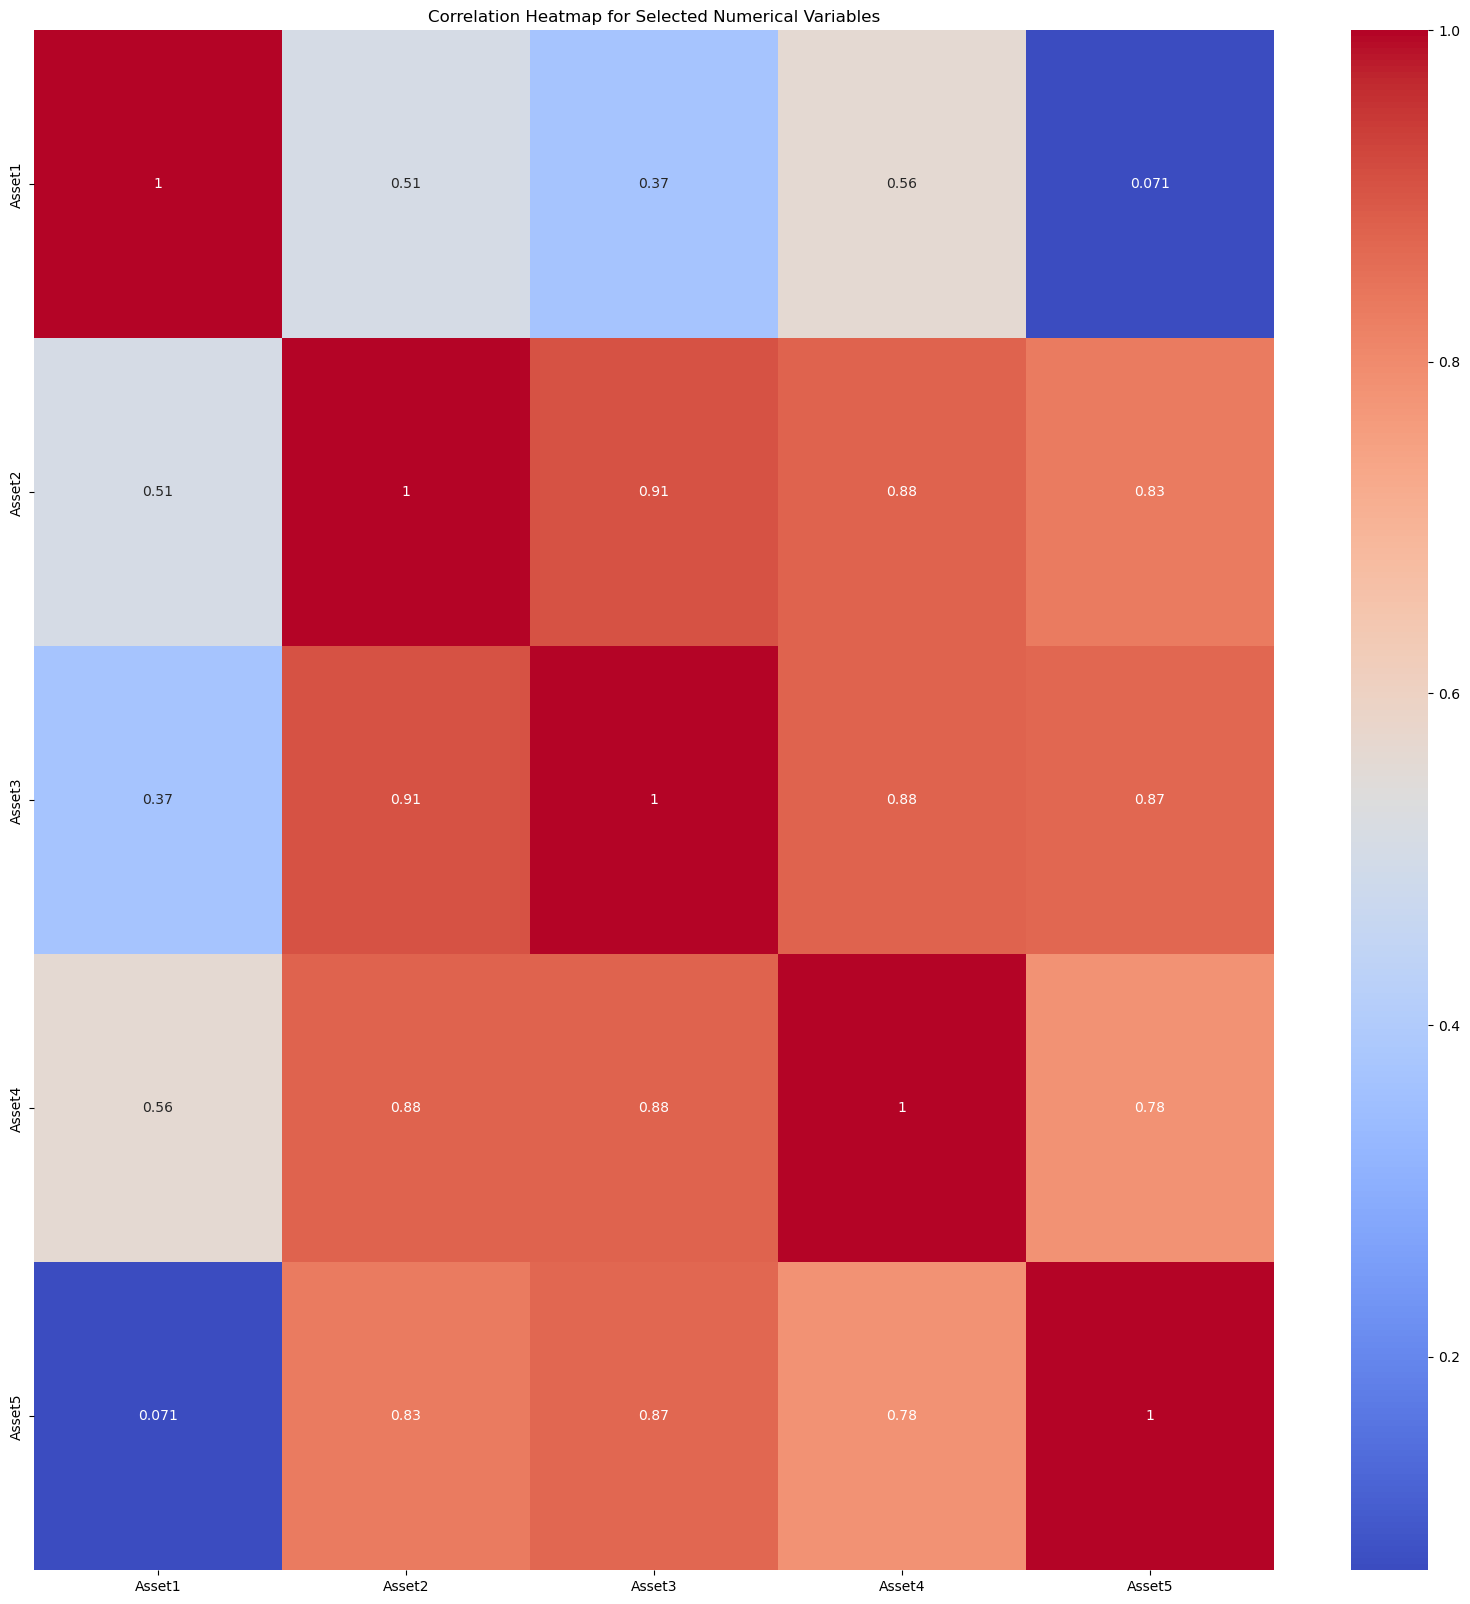

In [21]:
correlation_matrix = df_calor.corr()
plt.figure(figsize=(20, 20))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

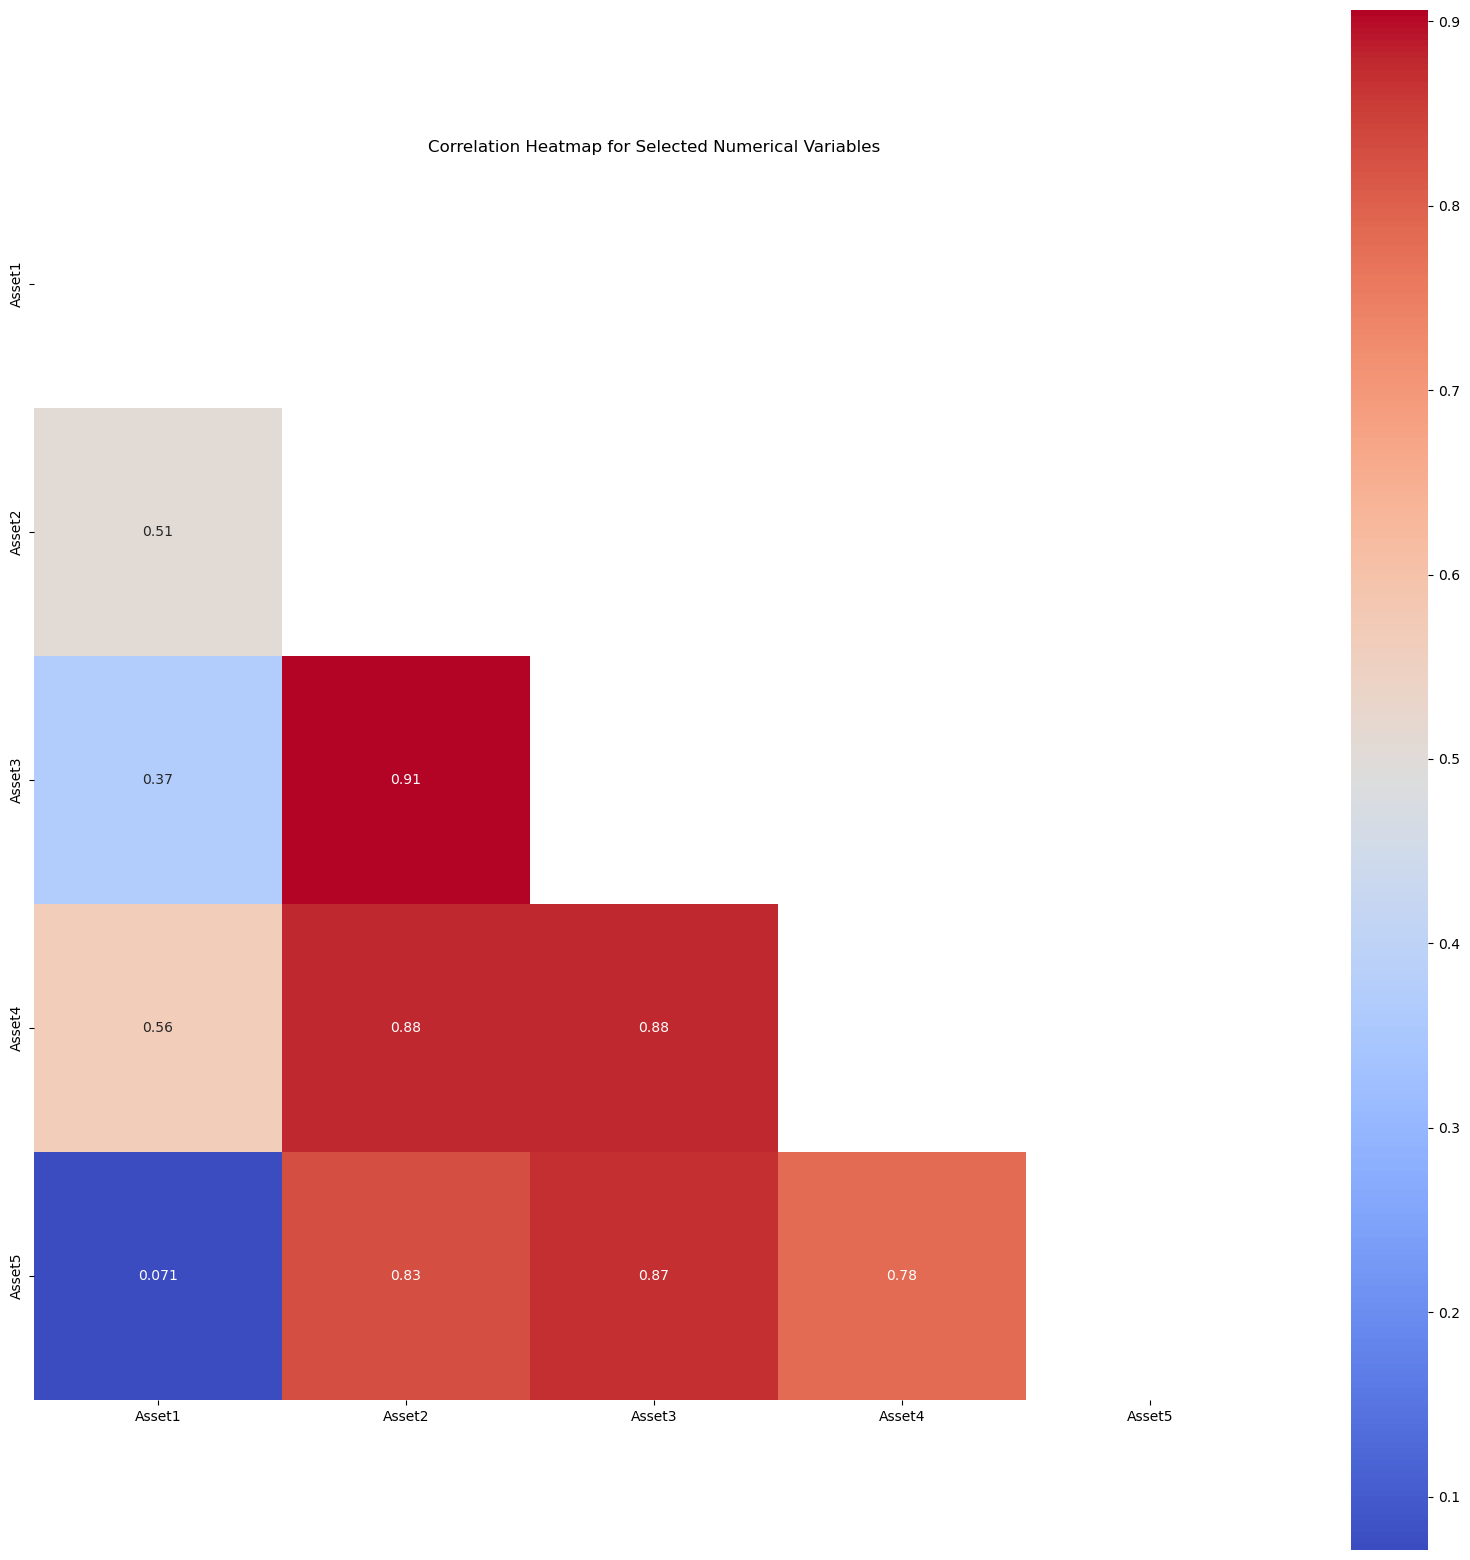

In [23]:
plt.figure(figsize=(20, 20))

# Creando una máscara para la mitad superior de la matriz, esto es solo paraquitar el duplicado, 
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Dibujando el heatmap con la máscara
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", square=True)

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

<h2 style="color: #FF6347;">Gráfico de dispersión entre los rendimientos de 2 activos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

Realizar un gráfico de dispersión entre los rendimientos de 2 activos.

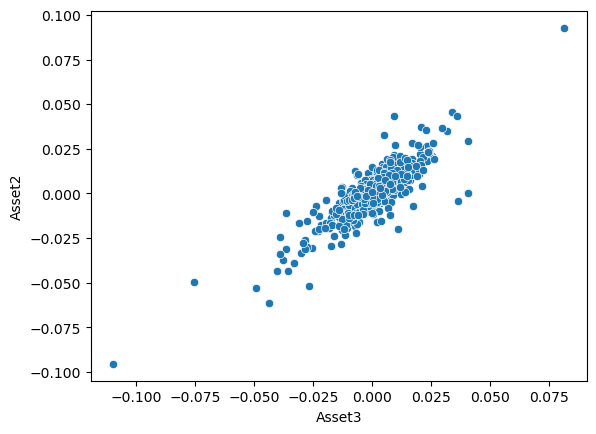

In [25]:
sns.scatterplot(data=rendimientos_diarios, x='Asset3', y='Asset2')
plt.show()

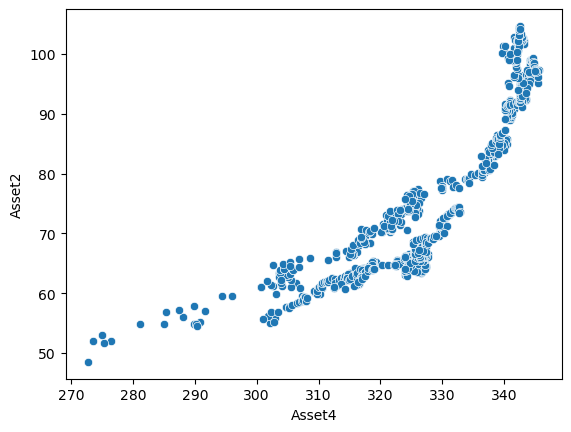

In [27]:
sns.scatterplot(data=df_limpio, x='Asset4', y='Asset2')
plt.show()

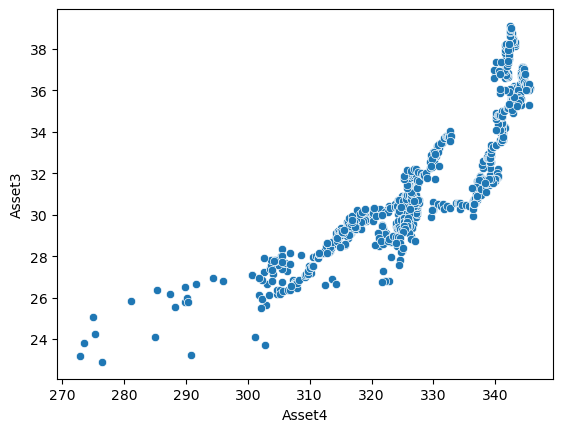

In [29]:
sns.scatterplot(data=df_limpio, x='Asset4', y='Asset3')
plt.show()

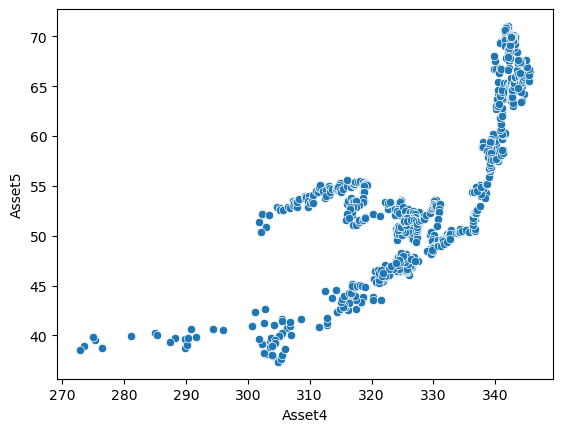

In [31]:
sns.scatterplot(data=df_limpio, x='Asset4', y='Asset5')
plt.show()

<h1 style="color: #FF8C00;">Ejercicio 3. Análisis de una cartera</h1>

Este tercer ejercicio consiste en calcular y analizar los resultados de una cartera. Para ello será necesario cargar el fichero con los pesos que tiene cada uno de los activos en cada uno de los días. Este fichero se llama `portfolio_weights.csv`.

Para completar el ejercicio, será necesario calcular:
- Gráfico de área de los pesos.
- Gráfico de la rentabilidad histórica acumulada de la cartera.
- Rentabilidad anualizada de la cartera.
- Volatilidad anualizada de la cartera. (Puedes usar el factor de anualización de 261 días)

Extra: Gráfico de área de los pesos de los activos agrupándolos por familia. Esta información está contenida en el fichero `financial_assets_information.csv`.

<h2 style="color: #FF6347;">Gráfico de área de los pesos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

Este tercer ejercicio consiste en calcular y analizar los resultados de una cartera. Para ello será necesario cargar el fichero con los pesos que tiene cada uno de los activos en cada uno de los días. Este fichero se llama portfolio_weights.csv.

In [33]:
df_volumen = pd.read_csv("C:/Users/astri/Ironhack/Assesment/Assement_portfolio/portfolio_weights.csv")
df_volumen.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [35]:
len(df_volumen)

783

In [37]:
df_volumen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    783 non-null    object 
 1   Asset1  783 non-null    float64
 2   Asset2  783 non-null    float64
 3   Asset3  783 non-null    float64
 4   Asset4  783 non-null    float64
 5   Asset5  783 non-null    float64
dtypes: float64(5), object(1)
memory usage: 36.8+ KB


Para completar el ejercicio, será necesario calcular:


Gráfico de la rentabilidad histórica acumulada de la cartera.
Rentabilidad anualizada de la cartera.
Volatilidad anualizada de la cartera. (Puedes usar el factor de anualización de 261 días)
Extra: Gráfico de área de los pesos de los activos agrupándolos por familia. Esta información está contenida en el fichero financial_assets_information.csv.

In [39]:
#ponemos las fechas en formato fecha para hacer el grafico
df_volumen['date'] = pd.to_datetime(df_volumen['date'])

**Gráfico de área de los pesos.**

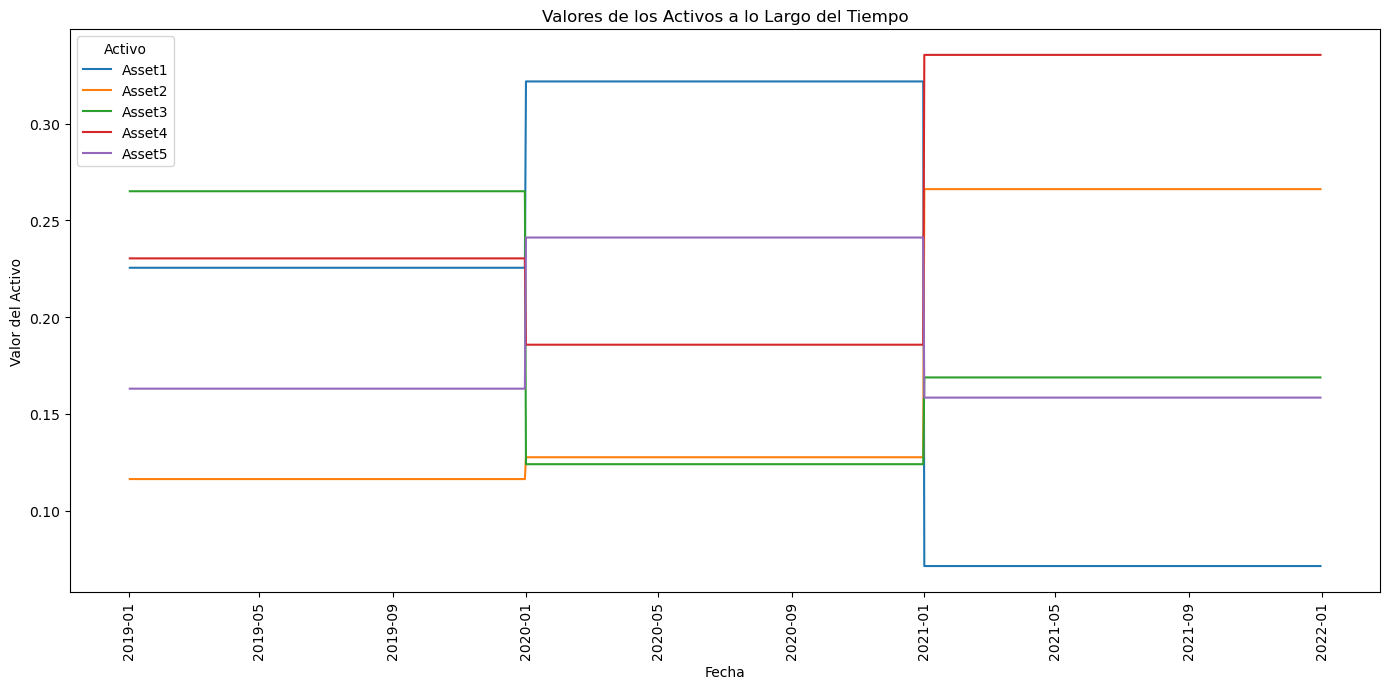

In [41]:
df_vols = df_volumen.melt(id_vars='date', value_vars=['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5'],
                         var_name='Activo', value_name='Valor')

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_vols, x='date', y='Valor', hue='Activo')

# Añadir etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Valor del Activo')
plt.title('Valores de los Activos a lo Largo del Tiempo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<h2 style="color: #FF6347;">Gráfico de la rentabilidad histórica acumulada de la cartera.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [43]:
rendimientos_ponderados = rendimientos_diarios * df_volumen[['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']].values


In [45]:
#sumamos los rendimientos ponderados por dia, para conocer el rendimiento de la cartera con todos los activos por dia
rendimiento_cartera_diario = rendimientos_ponderados.sum(axis=1)


In [47]:
#sacamos la rentabilidad acumulada, el cumprod()se usa para calcular el producto acumulado de una serie de datos.
rentabilidad_acumulada = (1 + rendimiento_cartera_diario).cumprod() - 1


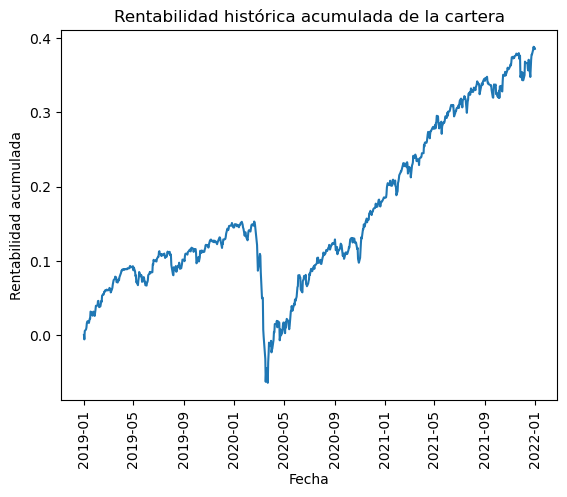

In [49]:
import matplotlib.pyplot as plt

plt.plot(df_limpio['date'], rentabilidad_acumulada)
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad acumulada')
plt.title('Rentabilidad histórica acumulada de la cartera')
plt.xticks(rotation=90)
plt.show()

<h2 style="color: #FF6347;">Rentabilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [51]:
#sacamos la rentabilidad diaria media
rentabilidad_media_diaria = rendimiento_cartera_diario.mean()

In [53]:
#para calcular la rentabilidad anual, usamos el factor de anualizacion que nos dan en las instrucciones que son  261 dias.
rentabilidad_anualizada = (1 + rentabilidad_media_diaria) ** 261 - 1
print(f"Rentabilidad Anualizada: {rentabilidad_anualizada:.4f}")

Rentabilidad Anualizada: 0.1189


<h2 style="color: #FF6347;">Volatilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [55]:
volatilidad_diaria = rendimiento_cartera_diario.std()

# Paso 2: Anualizar la volatilidad
volatilidad_anualizada = volatilidad_diaria * np.sqrt(261)
print(f"Volatilidad Anualizada: {volatilidad_anualizada:.4f}")

Volatilidad Anualizada: 0.0851
